# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('../data/hw2data.csv', index_col=0)

df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,y
0,,,,,,,,,,,,,,,,,,,,,
0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,0.895260,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,-1.000330,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,-0.855240,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,0.371173,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,-0.082344,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017
1.593274,0.568722,-0.114487,0.251630,-1.210856,-0.393734,0.085253,0.099422,-1.530616,0.327623,0.279196,...,1.363743,0.374138,1.310265,-0.267748,0.213176,-1.203243,1.178031,0.108648,0.044129,9.640786
0.338316,1.446792,-0.214495,1.663039,-0.851523,0.422185,2.009219,-0.489815,0.245256,0.877505,-0.137900,...,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802,4.490042
0.613349,1.843700,0.271091,1.136448,-1.738332,0.707135,0.030386,0.765002,0.867665,-2.256250,-0.443603,...,-0.034404,0.519269,-0.672583,1.173611,-1.592229,-0.013649,-0.098345,0.849877,-0.494986,-0.657482
1.068731,-0.233866,-0.101805,-0.149077,0.698096,0.853148,-0.604741,-1.408891,-0.981102,0.165183,-0.016646,...,0.424889,-0.271260,-0.683568,-1.537438,-0.101374,0.746666,0.929182,0.229418,0.414406,0.073541


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [3]:
y = df['y']
X = df.drop(['y'],1)

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Standardize features and Lasso regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#y_scaled = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

# Set up parameter alpha
alphas = np.logspace(-8, -3, 1000)
scores = np.empty(alphas.shape)

for i, alpha in enumerate(alphas):
    regr = Lasso(alpha)
    regr.fit(X_train, y_train)
    scores[i] = regr.score(X_test, y_test)

# Find the index of optimal scores and alphas
index_optim = scores.argmax()
alpha_optim = alphas[index_optim]

print ('Index: {0} \t Alpha: {1} \t Score: {2}'.format(index_optim,alpha_optim, scores[index_optim]))


C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Index: 893 	 Alpha: 0.00029476062551248586 	 Score: 0.8325246217951463


d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


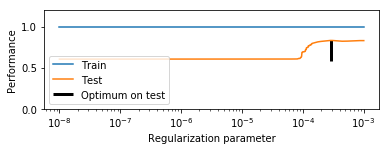

In [5]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

# Fill these in
alphas = np.logspace(-8,-3,1000)
train_errors=np.zeros(alphas.shape)
test_errors=np.zeros(alphas.shape)
alpha_optim=0

for i,alpha in enumerate(alphas):
    
    lasso = Lasso(alpha)
    lasso.fit(X_train, y_train)
    train_errors[i]=lasso.score(X_train, y_train)
    test_errors[i]=lasso.score(X_test, y_test)

index = np.argmax(test_errors)
alpha_optim = alphas[index]

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

Most of the coefficients are zero

Because:

Penalty for small coefficients is larger in L1 than in L2, which means that Lasso will not allow the existence of small coefficient.

C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


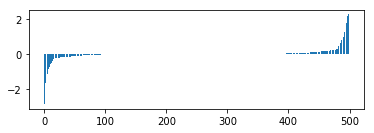

In [6]:
regr = Lasso(alpha_optim)
regr.fit(X_train, y_train)
coef_ = np.sort(np.array(regr.coef_))

plt.subplot(2, 1, 2)
plt.bar(range(499), coef_)
plt.legend()
plt.show()

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

For both normal and random cross validation, the scores are above 0.8, so it is a good model

C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

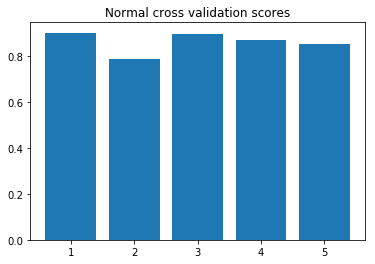

C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

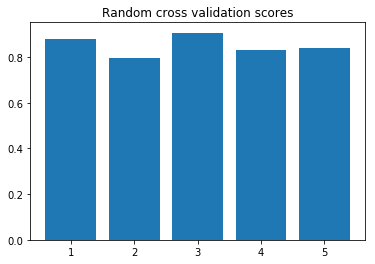

In [7]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

# Normal cross validation
regr = Lasso(alpha_optim)
scorecv = cross_val_score(regr, X_scaled, y, cv=5)
plt.bar(range(1, 6), scorecv)
plt.title('Normal cross validation scores')
plt.show()

# Random cross validation
cv = ShuffleSplit(n_splits=5, test_size=0.2)
scorecv = cross_val_score(regr, X_scaled, y, cv=cv)
plt.bar(range(1, 6), scorecv)
plt.title('Random cross validation scores')
plt.show()

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [8]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,alpha):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(alpha)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        
        coeffs.append(clf.coef_)
        
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Sa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [9]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

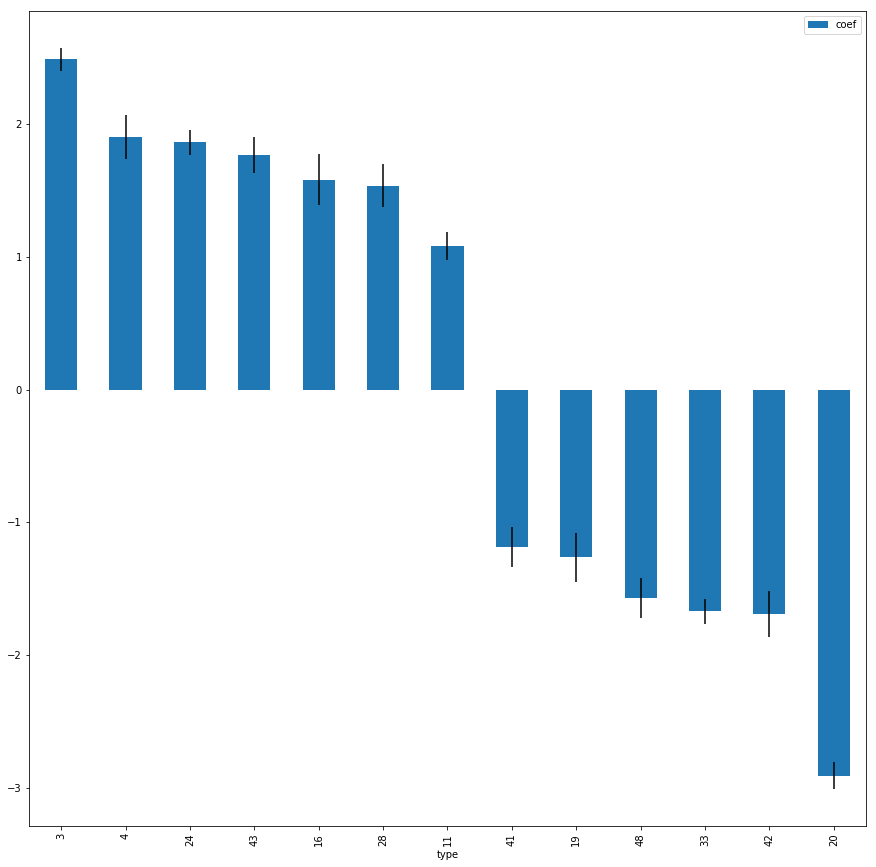

In [10]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))